<p style='text-align:center; font-size: 36px; color:#0B0B23; font-weight: bold;'>Sea Level Predictor</p>

This one is pretty cool. I will analyze a dataset of the global average sea level change since 1880 and use the data to predict the sea level change through year 2050.

Import the libs first

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Read data from the file

In [3]:
df = pd.read_csv('data/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Visualize better the data by making a scatter plot

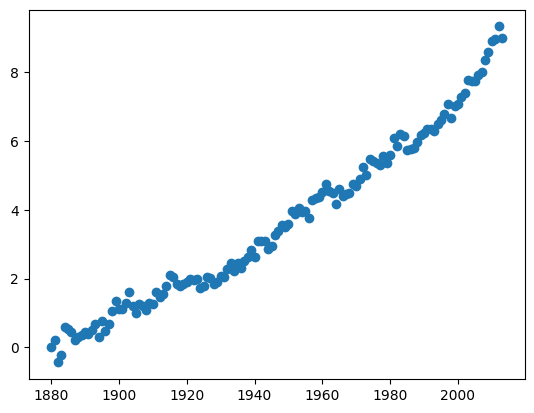

In [4]:
plt.scatter(x=df.Year, y=df['CSIRO Adjusted Sea Level'])

We can see the pattern of rising, so we can calculate the linear least-squares regression with scipy linregress function, and then plot the line on top of the scatter plot

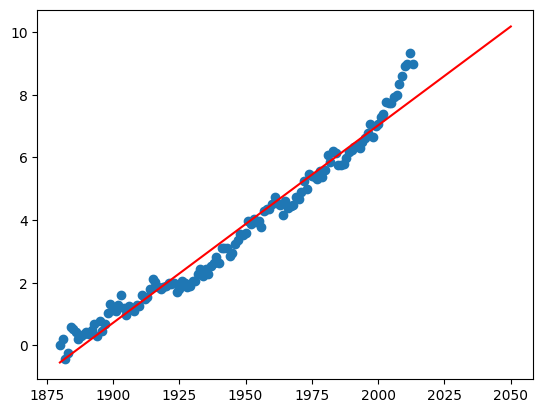

In [5]:
plt.scatter(x=df.Year, y=df['CSIRO Adjusted Sea Level'])

line = linregress(x=df.Year, y=df['CSIRO Adjusted Sea Level'])
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = line.intercept + line.slope*x_pred
plt.plot(x_pred, y_pred, 'r')

We can see the prediction of the sea level according to data from 1880, but we can also see a large curve starting from the 2000s, so let's plot a line basing off that

Text(0, 0.5, 'Sea Level (inches)')

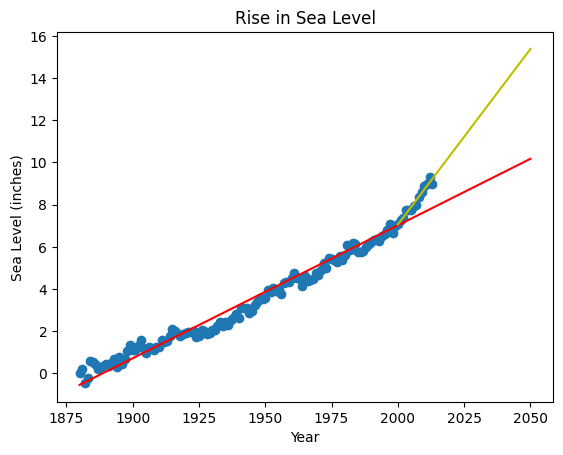

In [6]:
plt.scatter(x=df.Year, y=df['CSIRO Adjusted Sea Level'])

line = linregress(x=df.Year, y=df['CSIRO Adjusted Sea Level'])
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = line.intercept + line.slope*x_pred
plt.plot(x_pred, y_pred, 'r')

line_two = linregress(x=df.Year.tail(14), y=df['CSIRO Adjusted Sea Level'].tail(14))
x_pred_two = pd.Series([i for i in range(2000, 2051)])
y_pred_two = line_two.intercept + line_two.slope*x_pred_two
plt.plot(x_pred_two, y_pred_two, 'y')

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

Now we have a prediction if the rise remain the same from 1880 and a diferent predict if the rise remain growing like the 2000s, which quite frankly, it's very probable